In [1]:
# Libraries and options
# If error [No module named 'sklearn'], in terminal: conda install -c conda-forge scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [2]:
import pandas as pd
funda = pd.read_csv(r'C:\Users\zuzan\OneDrive\Desktop\repository\product3team9\data\cleaned\funda_with_buurt.csv')
funda.head()

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,categorieObject,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,...,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening,construction_year,house_type,postal_code,buurt,wijk,gemeente
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",Woonhuis,1,NaN,09F114F5C5EC061F6230349892132149,3,...,NaN,4388064,62,2018-11-12,1971,"woonboot, vrijstaande woning",NaN,NaN,NaN,NaN
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,Woonhuis,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,...,B,4388200,136,2018-08-30,1980,"eengezinswoning, tussenwoning",7481LK,Haaksbergen Kern-1,Wijk 00 Haaksbergen (dorp),Haaksbergen
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Appartement,0,NaN,E983FEDC63D87BF61AE952D181C8FD17,3,...,NaN,4399344,70,2018-11-23,2001,"tussenverdieping, appartement",1068MS,Calandlaan/Lelylaan,Osdorp-Oost,Amsterdam
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,Woonhuis,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,...,NaN,4400638,144,2018-12-14,1973,"eengezinswoning, geschakelde 2-onder-1-kapwoning",5628EN,Woenselse Heide,Wijk 15 Stadsdeel Woensel-Noord,Eindhoven
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,Woonhuis,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,...,NaN,4401765,323,2018-12-06,1900,"woonboerderij, vrijstaande woning",7731TV,Buurtschap Junne,Ommen,Ommen


In [5]:
funda_app = funda[funda['categorieObject'] == 'Appartement' ]
funda_house = funda[funda['categorieObject'] == 'Woonhuis']

#### Replacing perceelOppervlakte of woonhuis with its median and 
#### Replacing perceelOppervlakte of appartmenet with oppervlakte

In [6]:
#Median of perceelOppervlakte of woonhuis
median_house = funda_house['perceelOppervlakte'].median()

#impute perceelOppervlakte of appartment with oppervlakte
for row in range(len(funda)):
    if funda['perceelOppervlakte'].isna().iloc[row] == True and funda['categorieObject'].iloc[row] == 'Appartement':
        funda['perceelOppervlakte'].iloc[row] = funda['oppervlakte'].iloc[row]
    elif funda['perceelOppervlakte'].isna().iloc[row] == True and funda['categorieObject'].iloc[row] == 'Woonhuis':
        funda['perceelOppervlakte'].iloc[row] = median_house

#### Replacing aantalBadkamers with the its median

In [7]:
median_badkamers = funda['aantalBadkamers'].median()
for row in range(len(funda)):
    if funda['aantalBadkamers'].isna().iloc[row] == True:
        funda['aantalBadkamers'].iloc[row] = median_badkamers

#### Replacing missing values in energy label with 'no label'

In [9]:
funda['energielabelKlasse'].fillna('no_label', inplace = True)
funda

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,categorieObject,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,...,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening,construction_year,house_type,postal_code,buurt,wijk,gemeente
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",Woonhuis,1,208.0,09F114F5C5EC061F6230349892132149,3,...,no_label,4388064,62,2018-11-12,1971,"woonboot, vrijstaande woning",NaN,NaN,NaN,NaN
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,Woonhuis,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,...,B,4388200,136,2018-08-30,1980,"eengezinswoning, tussenwoning",7481LK,Haaksbergen Kern-1,Wijk 00 Haaksbergen (dorp),Haaksbergen
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Appartement,0,70.0,E983FEDC63D87BF61AE952D181C8FD17,3,...,no_label,4399344,70,2018-11-23,2001,"tussenverdieping, appartement",1068MS,Calandlaan/Lelylaan,Osdorp-Oost,Amsterdam
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,Woonhuis,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,...,no_label,4400638,144,2018-12-14,1973,"eengezinswoning, geschakelde 2-onder-1-kapwoning",5628EN,Woenselse Heide,Wijk 15 Stadsdeel Woensel-Noord,Eindhoven
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,Woonhuis,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,...,no_label,4401765,323,2018-12-06,1900,"woonboerderij, vrijstaande woning",7731TV,Buurtschap Junne,Ommen,Ommen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211612,4613507,2018-12-31,9791GD,159000.0,Ruime eengezinswoning aangeboden aan de rand v...,Woonhuis,1,195.0,AB928B88F4860C427BB7C6A27D6F2642,5,...,no_label,4613507,116,2019-03-07,1974,"eengezinswoning, tussenwoning",9791GD,Ten Boer,Wijk 00 West,Ten Boer
211613,4613532,2018-12-31,6431GT,179000.0,Nabij centrum van Hoensbroek met al haar voorz...,Woonhuis,1,160.0,4271E4C370DF497EE3BB23B3AED3E292,4,...,no_label,4613532,84,2019-01-17,1995,"eengezinswoning, geschakelde 2-onder-1-kapwoning",6431GT,De Dem en omgeving,Wijk 12 Hoensbroek-De Dem,Heerlen
211614,4613537,2018-12-31,4051EW,391500.0,Ook de kans aangrijpen om te mogen wonen in de...,Woonhuis,1,465.0,AB928B88F4860C427BB7C6A27D6F2642,5,...,no_label,4613537,99,2019-08-03,1948,"bungalow, vrijstaande woning, semi-bungalo",4051EW,Ochten,Wijk 01 Echteld,Neder-Betuwe
211615,4613566,2018-12-31,4043GG,375000.0,"BIEDEN VANAF € 375.000,= kosten koper\nHet uit...",Woonhuis,1,300.0,59A3951B92EB2334DC7295CEEA0FB547,7,...,A,4613566,172,2019-04-08,2006,"eengezinswoning, 2-onder-1-kapwoning",4043GG,Opheusden,Wijk 00 Kesteren,Neder-Betuwe


#### Getting rid off Nas in 'buurt', 'wijk', 'gemeente'

In [19]:
funda_null = funda.dropna(subset = ['buurt', 'wijk', 'gemeente'])
funda_null = funda_null.dropna(subset = ['koopPrijs'], axis = 0, inplace = False)
funda_null

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,categorieObject,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,...,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening,construction_year,house_type,postal_code,buurt,wijk,gemeente
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,Woonhuis,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,...,B,4388200,136,2018-08-30,1980,"eengezinswoning, tussenwoning",7481LK,Haaksbergen Kern-1,Wijk 00 Haaksbergen (dorp),Haaksbergen
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Appartement,0,70.0,E983FEDC63D87BF61AE952D181C8FD17,3,...,no_label,4399344,70,2018-11-23,2001,"tussenverdieping, appartement",1068MS,Calandlaan/Lelylaan,Osdorp-Oost,Amsterdam
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,Woonhuis,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,...,no_label,4400638,144,2018-12-14,1973,"eengezinswoning, geschakelde 2-onder-1-kapwoning",5628EN,Woenselse Heide,Wijk 15 Stadsdeel Woensel-Noord,Eindhoven
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,Woonhuis,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,...,no_label,4401765,323,2018-12-06,1900,"woonboerderij, vrijstaande woning",7731TV,Buurtschap Junne,Ommen,Ommen
5,4401831,2018-08-06,5971CR,162500.0,"In een rustige wijk, op korte afstand van het ...",Woonhuis,1,104.0,DA6EDCA2E6F7AADE8D9817099455ABC4,4,...,no_label,4401831,68,2019-04-06,1970,"eengezinswoning, hoekwoning",5971CR,'t Reuvelt,Wijk 08 Grubbenvorst,Horst aan de Maas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211612,4613507,2018-12-31,9791GD,159000.0,Ruime eengezinswoning aangeboden aan de rand v...,Woonhuis,1,195.0,AB928B88F4860C427BB7C6A27D6F2642,5,...,no_label,4613507,116,2019-03-07,1974,"eengezinswoning, tussenwoning",9791GD,Ten Boer,Wijk 00 West,Ten Boer
211613,4613532,2018-12-31,6431GT,179000.0,Nabij centrum van Hoensbroek met al haar voorz...,Woonhuis,1,160.0,4271E4C370DF497EE3BB23B3AED3E292,4,...,no_label,4613532,84,2019-01-17,1995,"eengezinswoning, geschakelde 2-onder-1-kapwoning",6431GT,De Dem en omgeving,Wijk 12 Hoensbroek-De Dem,Heerlen
211614,4613537,2018-12-31,4051EW,391500.0,Ook de kans aangrijpen om te mogen wonen in de...,Woonhuis,1,465.0,AB928B88F4860C427BB7C6A27D6F2642,5,...,no_label,4613537,99,2019-08-03,1948,"bungalow, vrijstaande woning, semi-bungalo",4051EW,Ochten,Wijk 01 Echteld,Neder-Betuwe
211615,4613566,2018-12-31,4043GG,375000.0,"BIEDEN VANAF € 375.000,= kosten koper\nHet uit...",Woonhuis,1,300.0,59A3951B92EB2334DC7295CEEA0FB547,7,...,A,4613566,172,2019-04-08,2006,"eengezinswoning, 2-onder-1-kapwoning",4043GG,Opheusden,Wijk 00 Kesteren,Neder-Betuwe


In [20]:
#Checking the null values in the cleaned dataset
funda_null.isna().sum()

globalId                 0
publicatieDatum          0
postcode                 0
koopPrijs                0
volledigeOmschrijving    0
categorieObject          0
indTuin                  0
perceelOppervlakte       0
kantoor_naam_MD5hash     0
aantalKamers             0
aantalBadkamers          0
energielabelKlasse       0
globalId.1               0
oppervlakte              0
datum_ondertekening      0
construction_year        0
house_type               0
postal_code              0
buurt                    0
wijk                     0
gemeente                 0
dtype: int64

#### Adding Selling Days in Dataset

In [21]:
funda_null['selling_days'] = pd.to_datetime(funda_null['datum_ondertekening']) - pd.to_datetime(funda_null['publicatieDatum'])
funda_null['selling_days'] = funda_null['selling_days'].dt.days.astype('int16')
funda_null['selling_days'] = np.where(funda_null['selling_days'] < 0, 0, funda_null['selling_days'])
funda_null

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,categorieObject,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,...,globalId.1,oppervlakte,datum_ondertekening,construction_year,house_type,postal_code,buurt,wijk,gemeente,selling_days
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,Woonhuis,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,...,4388200,136,2018-08-30,1980,"eengezinswoning, tussenwoning",7481LK,Haaksbergen Kern-1,Wijk 00 Haaksbergen (dorp),Haaksbergen,0
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Appartement,0,70.0,E983FEDC63D87BF61AE952D181C8FD17,3,...,4399344,70,2018-11-23,2001,"tussenverdieping, appartement",1068MS,Calandlaan/Lelylaan,Osdorp-Oost,Amsterdam,113
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,Woonhuis,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,...,4400638,144,2018-12-14,1973,"eengezinswoning, geschakelde 2-onder-1-kapwoning",5628EN,Woenselse Heide,Wijk 15 Stadsdeel Woensel-Noord,Eindhoven,132
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,Woonhuis,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,...,4401765,323,2018-12-06,1900,"woonboerderij, vrijstaande woning",7731TV,Buurtschap Junne,Ommen,Ommen,123
5,4401831,2018-08-06,5971CR,162500.0,"In een rustige wijk, op korte afstand van het ...",Woonhuis,1,104.0,DA6EDCA2E6F7AADE8D9817099455ABC4,4,...,4401831,68,2019-04-06,1970,"eengezinswoning, hoekwoning",5971CR,'t Reuvelt,Wijk 08 Grubbenvorst,Horst aan de Maas,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211612,4613507,2018-12-31,9791GD,159000.0,Ruime eengezinswoning aangeboden aan de rand v...,Woonhuis,1,195.0,AB928B88F4860C427BB7C6A27D6F2642,5,...,4613507,116,2019-03-07,1974,"eengezinswoning, tussenwoning",9791GD,Ten Boer,Wijk 00 West,Ten Boer,66
211613,4613532,2018-12-31,6431GT,179000.0,Nabij centrum van Hoensbroek met al haar voorz...,Woonhuis,1,160.0,4271E4C370DF497EE3BB23B3AED3E292,4,...,4613532,84,2019-01-17,1995,"eengezinswoning, geschakelde 2-onder-1-kapwoning",6431GT,De Dem en omgeving,Wijk 12 Hoensbroek-De Dem,Heerlen,17
211614,4613537,2018-12-31,4051EW,391500.0,Ook de kans aangrijpen om te mogen wonen in de...,Woonhuis,1,465.0,AB928B88F4860C427BB7C6A27D6F2642,5,...,4613537,99,2019-08-03,1948,"bungalow, vrijstaande woning, semi-bungalo",4051EW,Ochten,Wijk 01 Echteld,Neder-Betuwe,215
211615,4613566,2018-12-31,4043GG,375000.0,"BIEDEN VANAF € 375.000,= kosten koper\nHet uit...",Woonhuis,1,300.0,59A3951B92EB2334DC7295CEEA0FB547,7,...,4613566,172,2019-04-08,2006,"eengezinswoning, 2-onder-1-kapwoning",4043GG,Opheusden,Wijk 00 Kesteren,Neder-Betuwe,98


#### Adding house_age

In [22]:
funda_null['house_age'] = 2020 - funda_null['construction_year']
funda_null['house_age'] = np.where(funda_null['house_age'] < 0, 0, funda_null['house_age'])
funda_null

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,categorieObject,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,...,oppervlakte,datum_ondertekening,construction_year,house_type,postal_code,buurt,wijk,gemeente,selling_days,house_age
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,Woonhuis,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,...,136,2018-08-30,1980,"eengezinswoning, tussenwoning",7481LK,Haaksbergen Kern-1,Wijk 00 Haaksbergen (dorp),Haaksbergen,0,40
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Appartement,0,70.0,E983FEDC63D87BF61AE952D181C8FD17,3,...,70,2018-11-23,2001,"tussenverdieping, appartement",1068MS,Calandlaan/Lelylaan,Osdorp-Oost,Amsterdam,113,19
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,Woonhuis,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,...,144,2018-12-14,1973,"eengezinswoning, geschakelde 2-onder-1-kapwoning",5628EN,Woenselse Heide,Wijk 15 Stadsdeel Woensel-Noord,Eindhoven,132,47
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,Woonhuis,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,...,323,2018-12-06,1900,"woonboerderij, vrijstaande woning",7731TV,Buurtschap Junne,Ommen,Ommen,123,120
5,4401831,2018-08-06,5971CR,162500.0,"In een rustige wijk, op korte afstand van het ...",Woonhuis,1,104.0,DA6EDCA2E6F7AADE8D9817099455ABC4,4,...,68,2019-04-06,1970,"eengezinswoning, hoekwoning",5971CR,'t Reuvelt,Wijk 08 Grubbenvorst,Horst aan de Maas,243,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211612,4613507,2018-12-31,9791GD,159000.0,Ruime eengezinswoning aangeboden aan de rand v...,Woonhuis,1,195.0,AB928B88F4860C427BB7C6A27D6F2642,5,...,116,2019-03-07,1974,"eengezinswoning, tussenwoning",9791GD,Ten Boer,Wijk 00 West,Ten Boer,66,46
211613,4613532,2018-12-31,6431GT,179000.0,Nabij centrum van Hoensbroek met al haar voorz...,Woonhuis,1,160.0,4271E4C370DF497EE3BB23B3AED3E292,4,...,84,2019-01-17,1995,"eengezinswoning, geschakelde 2-onder-1-kapwoning",6431GT,De Dem en omgeving,Wijk 12 Hoensbroek-De Dem,Heerlen,17,25
211614,4613537,2018-12-31,4051EW,391500.0,Ook de kans aangrijpen om te mogen wonen in de...,Woonhuis,1,465.0,AB928B88F4860C427BB7C6A27D6F2642,5,...,99,2019-08-03,1948,"bungalow, vrijstaande woning, semi-bungalo",4051EW,Ochten,Wijk 01 Echteld,Neder-Betuwe,215,72
211615,4613566,2018-12-31,4043GG,375000.0,"BIEDEN VANAF € 375.000,= kosten koper\nHet uit...",Woonhuis,1,300.0,59A3951B92EB2334DC7295CEEA0FB547,7,...,172,2019-04-08,2006,"eengezinswoning, 2-onder-1-kapwoning",4043GG,Opheusden,Wijk 00 Kesteren,Neder-Betuwe,98,14


#### Dealing with Energy Label

In [23]:
for row in range(len(funda_null)):
    if funda_null['energielabelKlasse'].iloc[row] == 'no_label':
        funda_null['energielabelKlasse'].iloc[row] = funda_null['energielabelKlasse'].iloc[row]
    else:
        funda_null['energielabelKlasse'].iloc[row] = funda_null['energielabelKlasse'].iloc[row][0]

#### Choosing the right columns for further analysis

In [75]:
funda_final = funda_null[['categorieObject', 'indTuin', 'perceelOppervlakte', 'energielabelKlasse', 'aantalKamers', 'aantalBadkamers', 'oppervlakte', 'selling_days', 'house_age', 'buurt','koopPrijs']]
funda_final.head()
funda_final.shape

(205096, 11)

#### Adding criminality to funda

In [45]:
import pandas as pd
criminality = pd.read_csv(r'C:\Users\zuzan\cleaned_criminality.csv')
criminality.head()

,buurtname,Total_theft_from_house,Destruction,Violence_and_sexual_abuse
0,Annen,1,2,2
1,Verspreide huizen Annen,0,0,0
2,Eext,2,0,1
3,Verspreide huizen Eext,0,6,6
4,Anloo,0,3,0


In [46]:
import pandas as pd
income = pd.read_csv(r'C:\Users\zuzan\cleaned_income.csv')
income.head()

,buurtname,%_low_income_households,%_below_social_minimum
0,Annen,3,4
1,Eext,6,6
2,Anloo,7,6
3,Gasteren,5,4
4,Schipborg,4,3


In [47]:
criminality=criminality.drop_duplicates(subset='buurtname', keep='first', inplace=False, ignore_index=False)
criminality

,buurtname,Total_theft_from_house,Destruction,Violence_and_sexual_abuse
0,Annen,1,2,2
1,Verspreide huizen Annen,0,0,0
2,Eext,2,0,1
3,Verspreide huizen Eext,0,6,6
4,Anloo,0,3,0
...,...,...,...,...
11627,Gerenlanden,1,5,2
11628,Gerenbroek,2,3,1
11629,Oude Mars,3,0,0
11630,Windesheim,2,2,0


In [76]:
funda_final = pd.merge(funda_final, criminality, left_on = 'buurt', right_on = 'buurtname', how ='left')
funda_final

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,buurt,koopPrijs,buurtname,Total_theft_from_house,Destruction,Violence_and_sexual_abuse
0,Woonhuis,1,148.0,B,5,1.0,136,0,40,Haaksbergen Kern-1,209000.0,Haaksbergen Kern-1,2.0,3.0,3.0
1,Appartement,0,70.0,no_label,3,1.0,70,113,19,Calandlaan/Lelylaan,267500.0,Calandlaan/Lelylaan,1.0,6.0,1.0
2,Woonhuis,1,244.0,no_label,5,1.0,144,132,47,Woenselse Heide,349000.0,Woenselse Heide,3.0,6.0,3.0
3,Woonhuis,0,4500.0,no_label,8,1.0,323,123,120,Buurtschap Junne,495000.0,Buurtschap Junne,2.0,0.0,0.0
4,Woonhuis,1,104.0,no_label,4,1.0,68,243,50,'t Reuvelt,162500.0,'t Reuvelt,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,Woonhuis,1,195.0,no_label,5,1.0,116,66,46,Ten Boer,159000.0,Ten Boer,0.0,4.0,3.0
205092,Woonhuis,1,160.0,no_label,4,1.0,84,17,25,De Dem en omgeving,179000.0,De Dem en omgeving,5.0,5.0,5.0
205093,Woonhuis,1,465.0,no_label,5,1.0,99,215,72,Ochten,391500.0,Ochten,4.0,2.0,3.0
205094,Woonhuis,1,300.0,A,7,1.0,172,98,14,Opheusden,375000.0,Opheusden,1.0,1.0,2.0


In [77]:
funda_final = pd.merge(funda_final, income, left_on = 'buurt', right_on = 'buurtname', how ='left')
funda_final

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,buurt,koopPrijs,buurtname_x,Total_theft_from_house,Destruction,Violence_and_sexual_abuse,buurtname_y,%_low_income_households,%_below_social_minimum
0,Woonhuis,1,148.0,B,5,1.0,136,0,40,Haaksbergen Kern-1,209000.0,Haaksbergen Kern-1,2.0,3.0,3.0,Haaksbergen Kern-1,6.0,6.0
1,Appartement,0,70.0,no_label,3,1.0,70,113,19,Calandlaan/Lelylaan,267500.0,Calandlaan/Lelylaan,1.0,6.0,1.0,Calandlaan/Lelylaan,1.0,1.0
2,Woonhuis,1,244.0,no_label,5,1.0,144,132,47,Woenselse Heide,349000.0,Woenselse Heide,3.0,6.0,3.0,Woenselse Heide,1.0,9.0
3,Woonhuis,0,4500.0,no_label,8,1.0,323,123,120,Buurtschap Junne,495000.0,Buurtschap Junne,2.0,0.0,0.0,NaN,NaN,NaN
4,Woonhuis,1,104.0,no_label,4,1.0,68,243,50,'t Reuvelt,162500.0,'t Reuvelt,1.0,5.0,0.0,'t Reuvelt,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,Woonhuis,1,195.0,no_label,5,1.0,116,66,46,Ten Boer,159000.0,Ten Boer,0.0,4.0,3.0,Ten Boer,4.0,4.0
205092,Woonhuis,1,160.0,no_label,4,1.0,84,17,25,De Dem en omgeving,179000.0,De Dem en omgeving,5.0,5.0,5.0,De Dem en omgeving,1.0,1.0
205093,Woonhuis,1,465.0,no_label,5,1.0,99,215,72,Ochten,391500.0,Ochten,4.0,2.0,3.0,Ochten,3.0,4.0
205094,Woonhuis,1,300.0,A,7,1.0,172,98,14,Opheusden,375000.0,Opheusden,1.0,1.0,2.0,Opheusden,6.0,5.0


#### Classify the buurt based on the average house price

In [78]:
funda_subset = funda_null[['buurt', 'koopPrijs']]
funda_subset.isna().sum()

buurt        0
koopPrijs    0
dtype: int64

In [79]:
funda_buurt_grouped = funda_subset.groupby('buurt').mean().reset_index()
buurt_classification = []
for row in range(len(funda_buurt_grouped)):
    if funda_buurt_grouped['koopPrijs'].loc[row] <= 200000:
        brt_class = 'Low'
        buurt_classification.append(brt_class)
    elif funda_buurt_grouped['koopPrijs'].loc[row] > 200000 and funda_buurt_grouped['koopPrijs'].loc[row] <= 270000:
        brt_class = 'Moderate'
        buurt_classification.append(brt_class)
    elif funda_buurt_grouped['koopPrijs'].loc[row] > 270000 and funda_buurt_grouped['koopPrijs'].loc[row] <= 375000:
        brt_class = 'High'
        buurt_classification.append(brt_class)
    else:
        brt_class = 'Extremely High'
        buurt_classification.append(brt_class)
funda_buurt_grouped['buurt_classification'] = buurt_classification
funda_buurt_grouped = funda_buurt_grouped.drop('koopPrijs', axis = 1 )
funda_buurt_grouped

,buurt,buurt_classification
0,'n Oaln Diek,Moderate
1,'s Gravenland,Extremely High
2,'s Gravenmoer,High
3,'s-Graveland,Extremely High
4,'s-Gravendamseweg,Moderate
...,...,...
9807,muren,High
9808,nachthok,High
9809,terschuur,High
9810,velden,High


In [80]:
funda_price_final = pd.merge(funda_final, funda_buurt_grouped, left_on = 'buurt', right_on = 'buurt', how ='left')
funda_price_final

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,buurt,koopPrijs,buurtname_x,Total_theft_from_house,Destruction,Violence_and_sexual_abuse,buurtname_y,%_low_income_households,%_below_social_minimum,buurt_classification
0,Woonhuis,1,148.0,B,5,1.0,136,0,40,Haaksbergen Kern-1,209000.0,Haaksbergen Kern-1,2.0,3.0,3.0,Haaksbergen Kern-1,6.0,6.0,Moderate
1,Appartement,0,70.0,no_label,3,1.0,70,113,19,Calandlaan/Lelylaan,267500.0,Calandlaan/Lelylaan,1.0,6.0,1.0,Calandlaan/Lelylaan,1.0,1.0,High
2,Woonhuis,1,244.0,no_label,5,1.0,144,132,47,Woenselse Heide,349000.0,Woenselse Heide,3.0,6.0,3.0,Woenselse Heide,1.0,9.0,Moderate
3,Woonhuis,0,4500.0,no_label,8,1.0,323,123,120,Buurtschap Junne,495000.0,Buurtschap Junne,2.0,0.0,0.0,NaN,NaN,NaN,Extremely High
4,Woonhuis,1,104.0,no_label,4,1.0,68,243,50,'t Reuvelt,162500.0,'t Reuvelt,1.0,5.0,0.0,'t Reuvelt,1.0,1.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,Woonhuis,1,195.0,no_label,5,1.0,116,66,46,Ten Boer,159000.0,Ten Boer,0.0,4.0,3.0,Ten Boer,4.0,4.0,Moderate
205092,Woonhuis,1,160.0,no_label,4,1.0,84,17,25,De Dem en omgeving,179000.0,De Dem en omgeving,5.0,5.0,5.0,De Dem en omgeving,1.0,1.0,Low
205093,Woonhuis,1,465.0,no_label,5,1.0,99,215,72,Ochten,391500.0,Ochten,4.0,2.0,3.0,Ochten,3.0,4.0,High
205094,Woonhuis,1,300.0,A,7,1.0,172,98,14,Opheusden,375000.0,Opheusden,1.0,1.0,2.0,Opheusden,6.0,5.0,High


In [81]:
funda_price_final = funda_price_final.drop(['buurt','buurtname_y','buurtname_x'], axis = 1)
funda_price_final

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,koopPrijs,Total_theft_from_house,Destruction,Violence_and_sexual_abuse,%_low_income_households,%_below_social_minimum,buurt_classification
0,Woonhuis,1,148.0,B,5,1.0,136,0,40,209000.0,2.0,3.0,3.0,6.0,6.0,Moderate
1,Appartement,0,70.0,no_label,3,1.0,70,113,19,267500.0,1.0,6.0,1.0,1.0,1.0,High
2,Woonhuis,1,244.0,no_label,5,1.0,144,132,47,349000.0,3.0,6.0,3.0,1.0,9.0,Moderate
3,Woonhuis,0,4500.0,no_label,8,1.0,323,123,120,495000.0,2.0,0.0,0.0,NaN,NaN,Extremely High
4,Woonhuis,1,104.0,no_label,4,1.0,68,243,50,162500.0,1.0,5.0,0.0,1.0,1.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,Woonhuis,1,195.0,no_label,5,1.0,116,66,46,159000.0,0.0,4.0,3.0,4.0,4.0,Moderate
205092,Woonhuis,1,160.0,no_label,4,1.0,84,17,25,179000.0,5.0,5.0,5.0,1.0,1.0,Low
205093,Woonhuis,1,465.0,no_label,5,1.0,99,215,72,391500.0,4.0,2.0,3.0,3.0,4.0,High
205094,Woonhuis,1,300.0,A,7,1.0,172,98,14,375000.0,1.0,1.0,2.0,6.0,5.0,High


#### Dummy Coding 

In [82]:
funda_price_final['categorieObject'] = funda_price_final['categorieObject'].replace(['Appartement', 'Woonhuis'], [0,1])
funda_price_final = pd.get_dummies(funda_price_final, prefix = ['energielabelKlasse', 'buurt_classification'])
funda_price_final

,categorieObject,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,koopPrijs,Total_theft_from_house,...,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,energielabelKlasse_no_label,buurt_classification_Extremely High,buurt_classification_High,buurt_classification_Low,buurt_classification_Moderate
0,1,1,148.0,5,1.0,136,0,40,209000.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,70.0,3,1.0,70,113,19,267500.0,1.0,...,0,0,0,0,0,1,0,1,0,0
2,1,1,244.0,5,1.0,144,132,47,349000.0,3.0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,4500.0,8,1.0,323,123,120,495000.0,2.0,...,0,0,0,0,0,1,1,0,0,0
4,1,1,104.0,4,1.0,68,243,50,162500.0,1.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,1,1,195.0,5,1.0,116,66,46,159000.0,0.0,...,0,0,0,0,0,1,0,0,0,1
205092,1,1,160.0,4,1.0,84,17,25,179000.0,5.0,...,0,0,0,0,0,1,0,0,1,0
205093,1,1,465.0,5,1.0,99,215,72,391500.0,4.0,...,0,0,0,0,0,1,0,1,0,0
205094,1,1,300.0,7,1.0,172,98,14,375000.0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
funda_price_final = funda_price_final.dropna(subset = ['Total_theft_from_house', 'Destruction', 'Violence_and_sexual_abuse','%_low_income_households','%_below_social_minimum'])
funda_price_final.isna().sum()

categorieObject                        0
indTuin                                0
perceelOppervlakte                     0
aantalKamers                           0
aantalBadkamers                        0
oppervlakte                            0
selling_days                           0
house_age                              0
koopPrijs                              0
Total_theft_from_house                 0
Destruction                            0
Violence_and_sexual_abuse              0
%_low_income_households                0
%_below_social_minimum                 0
energielabelKlasse_A                   0
energielabelKlasse_B                   0
energielabelKlasse_C                   0
energielabelKlasse_D                   0
energielabelKlasse_E                   0
energielabelKlasse_F                   0
energielabelKlasse_G                   0
energielabelKlasse_no_label            0
buurt_classification_Extremely High    0
buurt_classification_High              0
buurt_classifica

### Data Normalization Using Sklearn

In [59]:
from sklearn.model_selection import train_test_split

x = funda_price_final.loc[:, funda_price_final.columns != 'koopPrijs']
y = funda_price_final['koopPrijs']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=9)

## Random Forest Regression

In [60]:
# Instantiate a Random Forest model
model = RandomForestRegressor(min_samples_split=50, n_estimators=150)

# Train the model
model.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=50, n_estimators=150)

In [61]:
# Test the model

RF_prediction = model.predict(x_test)

RF_prediction_inverted = np.expm1(RF_prediction)
y_test_inverted = np.expm1(y_test)

# Compute errors
MAE = mean_absolute_error(y_test, RF_prediction)
print('Random Forest MAE = ', MAE)

Random Forest MAE =  55744.52964114232


<IPython.core.display.Javascript object>


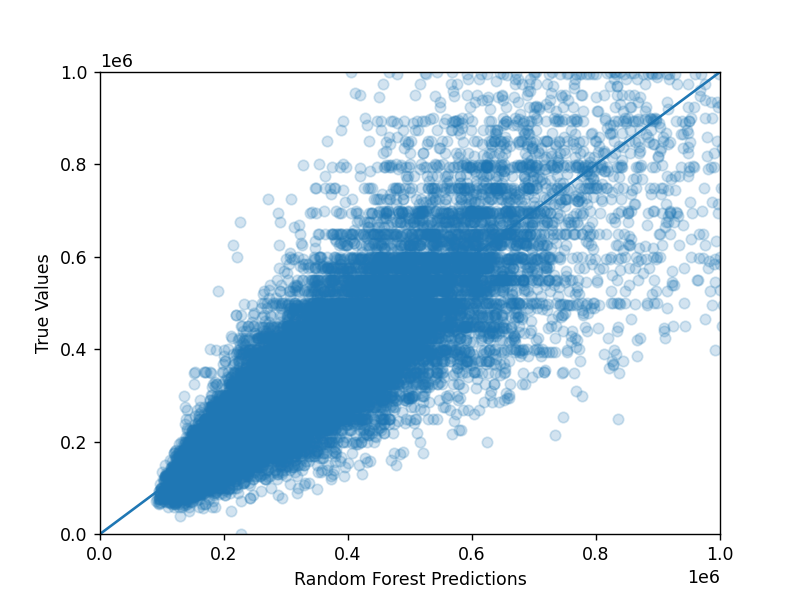

In [62]:
plt.figure()
plt.scatter(RF_prediction, y_test, alpha=0.2)
plt.xlabel('Random Forest Predictions')
plt.ylabel('True Values')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

In [63]:
funda_price_final.to_csv('funda_preprocessed2.csv', index = False)

### Splitting Training and Test Data

In [64]:
from sklearn.model_selection import train_test_split

x = funda_price_final.loc[:, funda_price_final.columns != 'koopPrijs']
y = funda_price_final['koopPrijs']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=9)

### Boosting Forest Tree

In [65]:
# Instantiate Boosting model
XGBModel = XGBRegressor(n_estimators=50, max_depth=3)

# Train Boosting model
XGBModel.fit(x_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
# Test the model
XGB_prediction = XGBModel.predict(x_test)

# Compute error
MAE = mean_absolute_error(y_test , XGB_prediction)
print('Boosting MAE = ',MAE)

Boosting MAE =  61885.07337906511


<IPython.core.display.Javascript object>


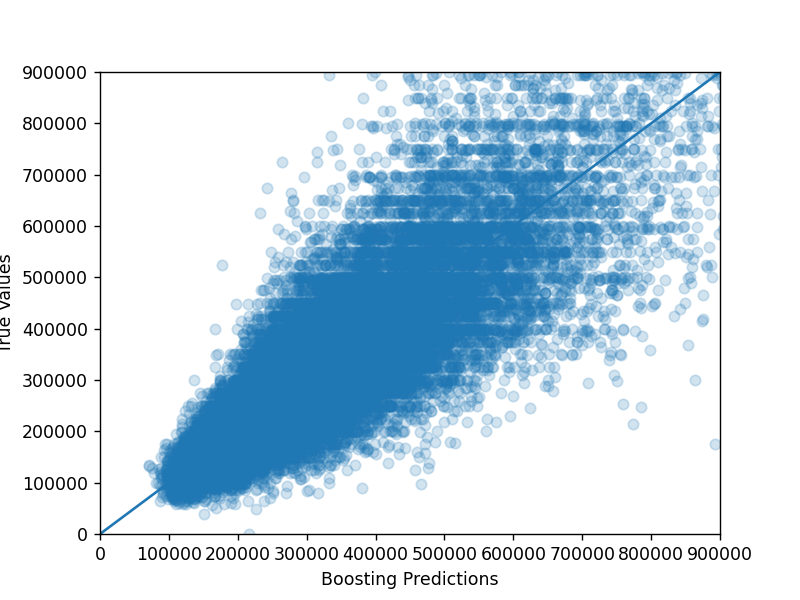

In [67]:
plt.figure()
plt.scatter(XGB_prediction, y_test, alpha=0.2)
plt.xlabel('Boosting Predictions')
plt.ylabel('True Values')
lims = [0, 900000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

# Neural Network 

In [68]:
# If error [No module named 'sklearn'], in terminal: conda install -c conda-forge scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
# pip install git+https://github.com/tensorflow/docs
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
# Libraries and options
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [69]:
# Initiate a sequential model (i.e., no recurrence)
NN_model = Sequential()

# Make the first layer
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# Make hidden layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))


# Make the output layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network
NN_model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3328      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 102,401
Trainable params: 102,401
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Define how to name the files
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
# Instantiate the checkpoint system
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 2, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [71]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
history = NN_model.fit(x_train, y_train, epochs=100, 
             # No. of randomly sampled data points used to compute the errors at each epoch (avoid overfitting)
             batch_size=32, 
             # Size of validation set for cross-validation
             validation_split = 0.2, 
             # Link to checkpoint system, to check teh best model previously built
             callbacks=([early_stopping]))

Epoch 1/100
4009/4009 [==============================] - 14s 3ms/step - loss: 44887024859.1003 - mean_absolute_error: 125826.6305 - val_loss: 18286757888.0000 - val_mean_absolute_error: 84742.9844
Epoch 2/100
4009/4009 [==============================] - 11s 3ms/step - loss: 19843056791.1741 - mean_absolute_error: 79977.8188 - val_loss: 14886991872.0000 - val_mean_absolute_error: 70003.9531
Epoch 3/100
4009/4009 [==============================] - 11s 3ms/step - loss: 18468607831.4613 - mean_absolute_error: 73693.5855 - val_loss: 18680492032.0000 - val_mean_absolute_error: 71873.9922
Epoch 4/100
4009/4009 [==============================] - 13s 3ms/step - loss: 16026789155.8783 - mean_absolute_error: 71257.1333 - val_loss: 14214367232.0000 - val_mean_absolute_error: 68005.0000
Epoch 5/100
4009/4009 [==============================] - 12s 3ms/step - loss: 15807377539.0005 - mean_absolute_error: 70316.6631 - val_loss: 15027928064.0000 - val_mean_absolute_error: 68635.2422
Epoch 6/100
4009/40

In [72]:
# Retrieve the hitory of every epoch's training
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
3,1.613860e+10,70923.289062,1.421437e+10,68005.000000,3
4,1.592106e+10,70082.578125,1.502793e+10,68635.242188,4
5,1.601755e+10,69484.609375,1.361106e+10,67396.679688,5
6,1.558718e+10,68875.390625,1.369102e+10,67108.242188,6
7,1.499605e+10,68228.703125,1.437366e+10,66360.343750,7


<IPython.core.display.Javascript object>


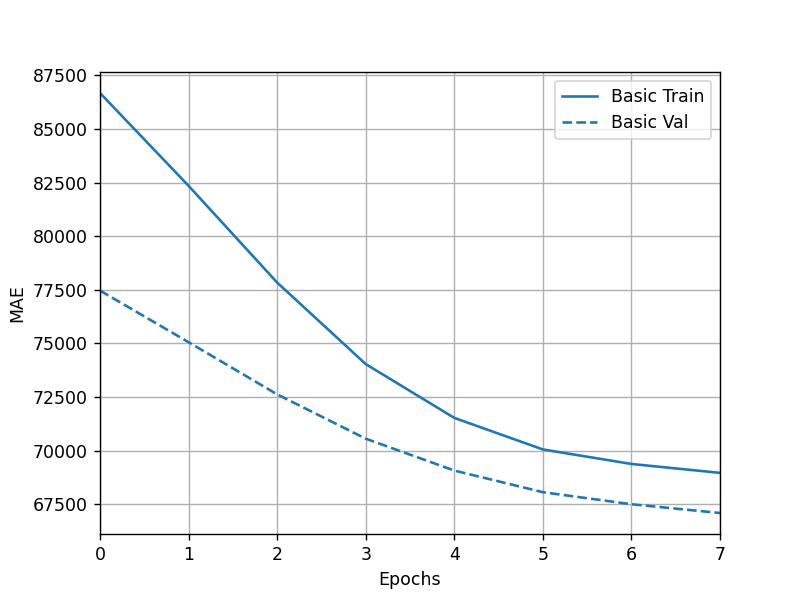

In [73]:
# Plot the evolution of errors epoch after epoch
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylabel('MAE')
plt.show()

## Applying Random Forest for Selling Days 

In [84]:
funda_final

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,buurt,koopPrijs,buurtname_x,Total_theft_from_house,Destruction,Violence_and_sexual_abuse,buurtname_y,%_low_income_households,%_below_social_minimum
0,Woonhuis,1,148.0,B,5,1.0,136,0,40,Haaksbergen Kern-1,209000.0,Haaksbergen Kern-1,2.0,3.0,3.0,Haaksbergen Kern-1,6.0,6.0
1,Appartement,0,70.0,no_label,3,1.0,70,113,19,Calandlaan/Lelylaan,267500.0,Calandlaan/Lelylaan,1.0,6.0,1.0,Calandlaan/Lelylaan,1.0,1.0
2,Woonhuis,1,244.0,no_label,5,1.0,144,132,47,Woenselse Heide,349000.0,Woenselse Heide,3.0,6.0,3.0,Woenselse Heide,1.0,9.0
3,Woonhuis,0,4500.0,no_label,8,1.0,323,123,120,Buurtschap Junne,495000.0,Buurtschap Junne,2.0,0.0,0.0,NaN,NaN,NaN
4,Woonhuis,1,104.0,no_label,4,1.0,68,243,50,'t Reuvelt,162500.0,'t Reuvelt,1.0,5.0,0.0,'t Reuvelt,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,Woonhuis,1,195.0,no_label,5,1.0,116,66,46,Ten Boer,159000.0,Ten Boer,0.0,4.0,3.0,Ten Boer,4.0,4.0
205092,Woonhuis,1,160.0,no_label,4,1.0,84,17,25,De Dem en omgeving,179000.0,De Dem en omgeving,5.0,5.0,5.0,De Dem en omgeving,1.0,1.0
205093,Woonhuis,1,465.0,no_label,5,1.0,99,215,72,Ochten,391500.0,Ochten,4.0,2.0,3.0,Ochten,3.0,4.0
205094,Woonhuis,1,300.0,A,7,1.0,172,98,14,Opheusden,375000.0,Opheusden,1.0,1.0,2.0,Opheusden,6.0,5.0


In [85]:
funda_selling_days = funda_final.copy()
funda_selling_days = funda_selling_days.drop(['buurtname_x','buurtname_y',],axis = 1)
funda_selling_days

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,buurt,koopPrijs,Total_theft_from_house,Destruction,Violence_and_sexual_abuse,%_low_income_households,%_below_social_minimum
0,Woonhuis,1,148.0,B,5,1.0,136,0,40,Haaksbergen Kern-1,209000.0,2.0,3.0,3.0,6.0,6.0
1,Appartement,0,70.0,no_label,3,1.0,70,113,19,Calandlaan/Lelylaan,267500.0,1.0,6.0,1.0,1.0,1.0
2,Woonhuis,1,244.0,no_label,5,1.0,144,132,47,Woenselse Heide,349000.0,3.0,6.0,3.0,1.0,9.0
3,Woonhuis,0,4500.0,no_label,8,1.0,323,123,120,Buurtschap Junne,495000.0,2.0,0.0,0.0,NaN,NaN
4,Woonhuis,1,104.0,no_label,4,1.0,68,243,50,'t Reuvelt,162500.0,1.0,5.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,Woonhuis,1,195.0,no_label,5,1.0,116,66,46,Ten Boer,159000.0,0.0,4.0,3.0,4.0,4.0
205092,Woonhuis,1,160.0,no_label,4,1.0,84,17,25,De Dem en omgeving,179000.0,5.0,5.0,5.0,1.0,1.0
205093,Woonhuis,1,465.0,no_label,5,1.0,99,215,72,Ochten,391500.0,4.0,2.0,3.0,3.0,4.0
205094,Woonhuis,1,300.0,A,7,1.0,172,98,14,Opheusden,375000.0,1.0,1.0,2.0,6.0,5.0


In [86]:
funda_subset = funda_null[['buurt', 'selling_days']]
funda_subset.isna().sum()

buurt           0
selling_days    0
dtype: int64

In [87]:
funda_selling_days.describe()

,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,koopPrijs,Total_theft_from_house,Destruction,Violence_and_sexual_abuse,%_low_income_households,%_below_social_minimum
count,205096.000000,205096.000000,205096.000000,205096.000000,205096.000000,205096.000000,205096.000000,2.050960e+05,204033.000000,204033.000000,204033.000000,200465.000000,200465.000000
mean,0.708376,408.904581,4.657833,1.079894,119.581264,60.631148,47.809284,3.202720e+05,2.848387,3.233776,3.034004,3.793849,3.724131
std,0.454511,2098.427633,1.585981,0.299107,49.520429,70.084081,38.551246,2.041523e+05,2.045286,2.129669,2.205982,2.445265,2.397071
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.150000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,103.000000,4.000000,1.000000,90.000000,18.000000,20.000000,2.000000e+05,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.000000,159.000000,5.000000,1.000000,114.000000,32.000000,43.000000,2.700000e+05,2.000000,3.000000,3.000000,3.000000,3.000000
75%,1.000000,268.000000,5.000000,1.000000,139.000000,76.000000,64.000000,3.750000e+05,4.000000,5.000000,4.000000,6.000000,5.000000
max,1.000000,297500.000000,41.000000,8.000000,3210.000000,618.000000,1015.000000,9.950000e+06,9.000000,9.000000,9.000000,9.000000,9.000000


In [88]:
funda_buurt_grouped = funda_subset.groupby('buurt').mean().reset_index()
buurt_classification = []
for row in range(len(funda_buurt_grouped)):
    if funda_buurt_grouped['selling_days'].loc[row] <= 18:
        brt_class = 'Low'
        buurt_classification.append(brt_class)
    elif funda_buurt_grouped['selling_days'].loc[row] > 18 and funda_buurt_grouped['selling_days'].loc[row] <= 32:
        brt_class = 'Moderate'
        buurt_classification.append(brt_class)
    elif funda_buurt_grouped['selling_days'].loc[row] > 32 and funda_buurt_grouped['selling_days'].loc[row] <= 76:
        brt_class = 'High'
        buurt_classification.append(brt_class)
    else:
        brt_class = 'Extremely High'
        buurt_classification.append(brt_class)
funda_buurt_grouped['brt_sldays'] = buurt_classification
funda_buurt_grouped = funda_buurt_grouped.drop('selling_days', axis = 1)
funda_buurt_grouped

,buurt,brt_sldays
0,'n Oaln Diek,High
1,'s Gravenland,Extremely High
2,'s Gravenmoer,High
3,'s-Graveland,Extremely High
4,'s-Gravendamseweg,High
...,...,...
9807,muren,High
9808,nachthok,Low
9809,terschuur,High
9810,velden,Moderate


In [89]:
import pandas as pd
funda_selling_days = pd.merge(funda_selling_days, funda_buurt_grouped,left_on = "buurt", right_on="buurt", how ="left")
funda_selling_days = funda_selling_days.drop("buurt", axis = 1)
funda_selling_days

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,buurt,koopPrijs,Total_theft_from_house,Destruction,Violence_and_sexual_abuse,%_low_income_households,%_below_social_minimum,brt_sldays
0,Woonhuis,1,148.0,B,5,1.0,136,0,40,Haaksbergen Kern-1,209000.0,2.0,3.0,3.0,6.0,6.0,Extremely High
1,Appartement,0,70.0,no_label,3,1.0,70,113,19,Calandlaan/Lelylaan,267500.0,1.0,6.0,1.0,1.0,1.0,Moderate
2,Woonhuis,1,244.0,no_label,5,1.0,144,132,47,Woenselse Heide,349000.0,3.0,6.0,3.0,1.0,9.0,High
3,Woonhuis,0,4500.0,no_label,8,1.0,323,123,120,Buurtschap Junne,495000.0,2.0,0.0,0.0,NaN,NaN,High
4,Woonhuis,1,104.0,no_label,4,1.0,68,243,50,'t Reuvelt,162500.0,1.0,5.0,0.0,1.0,1.0,Extremely High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,Woonhuis,1,195.0,no_label,5,1.0,116,66,46,Ten Boer,159000.0,0.0,4.0,3.0,4.0,4.0,High
205092,Woonhuis,1,160.0,no_label,4,1.0,84,17,25,De Dem en omgeving,179000.0,5.0,5.0,5.0,1.0,1.0,High
205093,Woonhuis,1,465.0,no_label,5,1.0,99,215,72,Ochten,391500.0,4.0,2.0,3.0,3.0,4.0,High
205094,Woonhuis,1,300.0,A,7,1.0,172,98,14,Opheusden,375000.0,1.0,1.0,2.0,6.0,5.0,High


In [94]:
funda_selling_days['categorieObject'] = funda_selling_days['categorieObject'].replace(['Appartement', 'Woonhuis'], [0,1])
funda_selling_days = pd.get_dummies(funda_selling_days, prefix = ['energielabelKlasse', 'brt_sldays'])
funda_selling_days

,categorieObject,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,koopPrijs,Total_theft_from_house,...,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,energielabelKlasse_no_label,brt_sldays_Extremely High,brt_sldays_High,brt_sldays_Low,brt_sldays_Moderate
0,1,1,148.0,5,1.0,136,0,40,209000.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,70.0,3,1.0,70,113,19,267500.0,1.0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,244.0,5,1.0,144,132,47,349000.0,3.0,...,0,0,0,0,0,1,0,1,0,0
3,1,0,4500.0,8,1.0,323,123,120,495000.0,2.0,...,0,0,0,0,0,1,0,1,0,0
4,1,1,104.0,4,1.0,68,243,50,162500.0,1.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,1,1,195.0,5,1.0,116,66,46,159000.0,0.0,...,0,0,0,0,0,1,0,1,0,0
205092,1,1,160.0,4,1.0,84,17,25,179000.0,5.0,...,0,0,0,0,0,1,0,1,0,0
205093,1,1,465.0,5,1.0,99,215,72,391500.0,4.0,...,0,0,0,0,0,1,0,1,0,0
205094,1,1,300.0,7,1.0,172,98,14,375000.0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [96]:
funda_selling_days_final = funda_selling_days.dropna(subset = ['Total_theft_from_house', 'Destruction', 'Violence_and_sexual_abuse','%_low_income_households','%_below_social_minimum'])
funda_selling_days_final

,categorieObject,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,koopPrijs,Total_theft_from_house,...,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,energielabelKlasse_no_label,brt_sldays_Extremely High,brt_sldays_High,brt_sldays_Low,brt_sldays_Moderate
0,1,1,148.0,5,1.0,136,0,40,209000.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,70.0,3,1.0,70,113,19,267500.0,1.0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,244.0,5,1.0,144,132,47,349000.0,3.0,...,0,0,0,0,0,1,0,1,0,0
4,1,1,104.0,4,1.0,68,243,50,162500.0,1.0,...,0,0,0,0,0,1,1,0,0,0
5,1,1,1028.0,5,1.0,184,221,33,217500.0,1.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,1,1,195.0,5,1.0,116,66,46,159000.0,0.0,...,0,0,0,0,0,1,0,1,0,0
205092,1,1,160.0,4,1.0,84,17,25,179000.0,5.0,...,0,0,0,0,0,1,0,1,0,0
205093,1,1,465.0,5,1.0,99,215,72,391500.0,4.0,...,0,0,0,0,0,1,0,1,0,0
205094,1,1,300.0,7,1.0,172,98,14,375000.0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [97]:
funda_selling_days_final.isna().sum()

categorieObject                0
indTuin                        0
perceelOppervlakte             0
aantalKamers                   0
aantalBadkamers                0
oppervlakte                    0
selling_days                   0
house_age                      0
koopPrijs                      0
Total_theft_from_house         0
Destruction                    0
Violence_and_sexual_abuse      0
%_low_income_households        0
%_below_social_minimum         0
energielabelKlasse_A           0
energielabelKlasse_B           0
energielabelKlasse_C           0
energielabelKlasse_D           0
energielabelKlasse_E           0
energielabelKlasse_F           0
energielabelKlasse_G           0
energielabelKlasse_no_label    0
brt_sldays_Extremely High      0
brt_sldays_High                0
brt_sldays_Low                 0
brt_sldays_Moderate            0
dtype: int64

In [98]:
from sklearn.model_selection import train_test_split

x = funda_selling_days_final.loc[:, funda_selling_days_final.columns != 'selling_days']
y = funda_selling_days_final['selling_days']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=9)

In [99]:
# Instantiate a Random Forest model
model = RandomForestRegressor(min_samples_split=50, n_estimators=150)

# Train the model
model.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=50, n_estimators=150)

In [100]:
# Test the model

RF_prediction = model.predict(x_test)

RF_prediction_inverted = np.expm1(RF_prediction)
y_test_inverted = np.expm1(y_test)

# Compute errors
MAE = mean_absolute_error(y_test, RF_prediction)
print('Random Forest MAE = ', MAE)

Random Forest MAE =  41.205084431442884


<IPython.core.display.Javascript object>


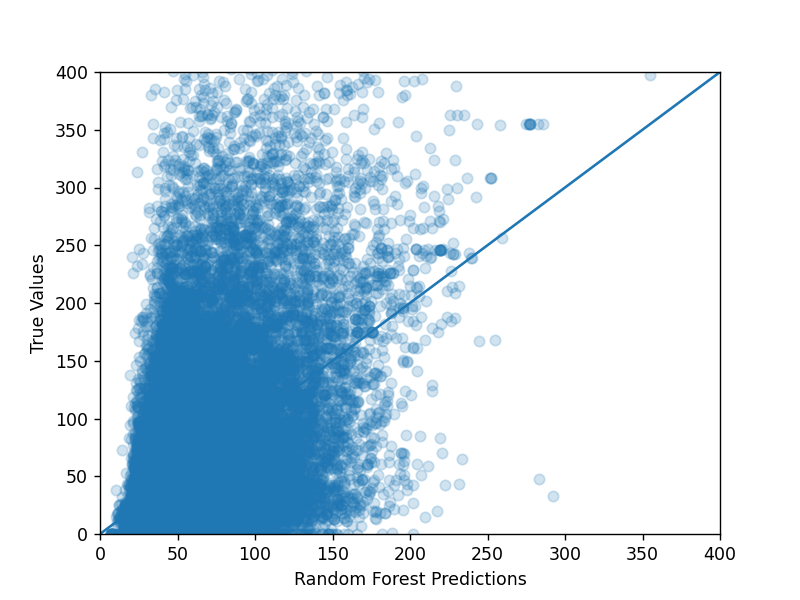

In [101]:
plt.figure()
plt.scatter(RF_prediction, y_test, alpha=0.2)
plt.xlabel('Random Forest Predictions')
plt.ylabel('True Values')
lims = [0, 400]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

In [102]:
funda_selling_days_final.corr()['koopPrijs'].reset_index().sort_values(by = 'koopPrijs', ascending = False)

,index,koopPrijs
8,koopPrijs,1.000000
5,oppervlakte,0.655842
4,aantalBadkamers,0.426246
3,aantalKamers,0.393048
2,perceelOppervlakte,0.188531
6,selling_days,0.149982
0,categorieObject,0.118556
1,indTuin,0.103895
14,energielabelKlasse_A,0.075158
21,energielabelKlasse_no_label,0.052050
